In [2]:
import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=1_WbnYVHQCZxu8CwJd_LPnJs87nY_6OGJ'
df = pd.read_csv(url)
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace(' ','_')
df=df.rename(columns={'purchase_amount_(usd)':'purchase_amount'}) #Rename column

In [4]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3900 non-null   int64  
 1   age                     3900 non-null   int64  
 2   gender                  3900 non-null   object 
 3   item_purchased          3900 non-null   object 
 4   category                3900 non-null   object 
 5   purchase_amount         3900 non-null   int64  
 6   location                3900 non-null   object 
 7   size                    3900 non-null   object 
 8   color                   3900 non-null   object 
 9   season                  3900 non-null   object 
 10  review_rating           3863 non-null   float64
 11  subscription_status     3900 non-null   object 
 12  shipping_type           3900 non-null   object 
 13  discount_applied        3900 non-null   object 
 14  promo_code_used         3900 non-null   

In [6]:
df.isnull().sum()

customer_id                0
age                        0
gender                     0
item_purchased             0
category                   0
purchase_amount            0
location                   0
size                       0
color                      0
season                     0
review_rating             37
subscription_status        0
shipping_type              0
discount_applied           0
promo_code_used            0
previous_purchases         0
payment_method             0
frequency_of_purchases     0
dtype: int64

In [7]:
# Imputing missing values in Review Rating column with the median rating of the product category

df['review_rating'] = df.groupby('category')['review_rating'].transform(lambda x: x.fillna(x.median()))

In [8]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
item_purchased            0
category                  0
purchase_amount           0
location                  0
size                      0
color                     0
season                    0
review_rating             0
subscription_status       0
shipping_type             0
discount_applied          0
promo_code_used           0
previous_purchases        0
payment_method            0
frequency_of_purchases    0
dtype: int64

In [9]:
#creating a new column age_group for better analysis
labels = ['Young Adult', 'Adult', 'Middle-aged', 'Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels = labels)

In [10]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged
5,46,Middle-aged
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle-aged


In [11]:
# create new column purchase_frequency_days to convert in numbers

frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [12]:
df[['purchase_frequency_days','frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually
5,7,Weekly
6,90,Quarterly
7,7,Weekly
8,365,Annually
9,90,Quarterly


In [13]:
#checking redundant/irrelevant columns
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [14]:
(df['discount_applied'] == df['promo_code_used']).all()

True

In [15]:
df = df.drop('promo_code_used', axis=1)

In [16]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

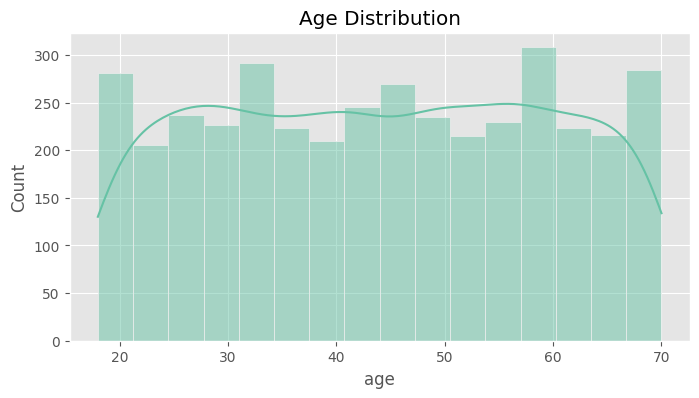

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
plt.style.use("ggplot")
sns.set_palette("Set2")


## AGE DISTRIBUTION
plt.figure(figsize=(8,4))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


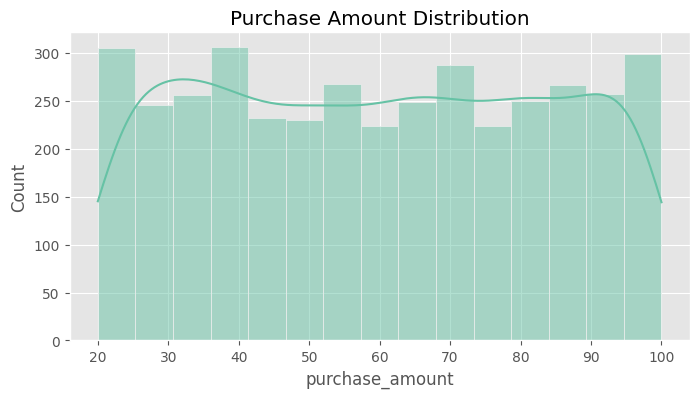

In [22]:

## PURCHASE AMOUNT DISTRIBUTION
plt.figure(figsize=(8,4))
sns.histplot(df['purchase_amount'], kde=True)
plt.title("Purchase Amount Distribution")
plt.show()


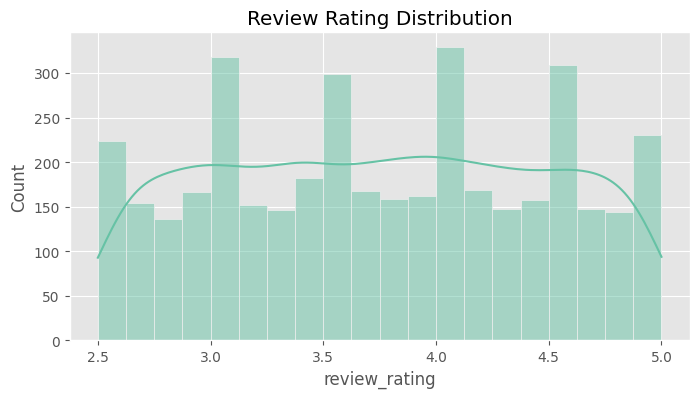

In [23]:

## REVIEW RATING DISTRIBUTION
plt.figure(figsize=(8,4))
sns.histplot(df['review_rating'], kde=True, bins=20)
plt.title("Review Rating Distribution")
plt.show()


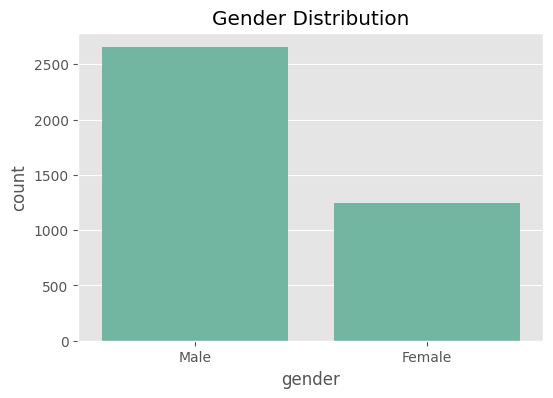

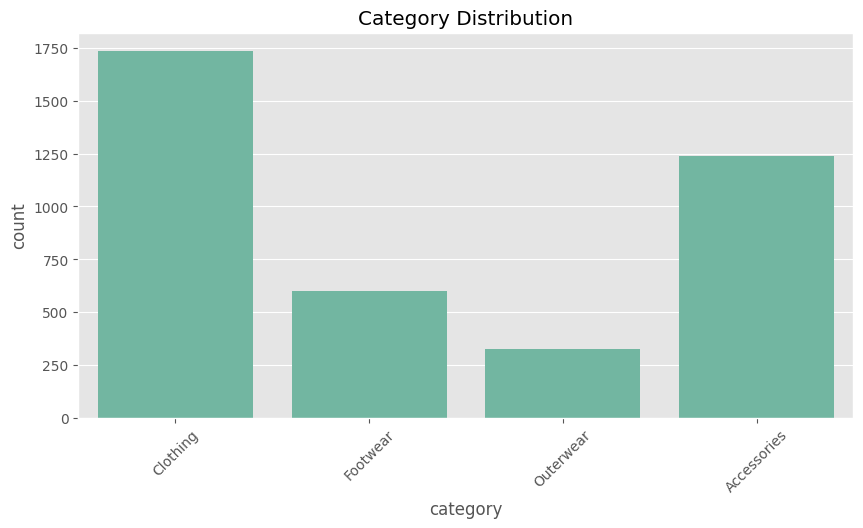

In [24]:
## GENDER COUNT
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="gender")
plt.title("Gender Distribution")
plt.show()

## CATEGORY COUNT
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="category")
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()


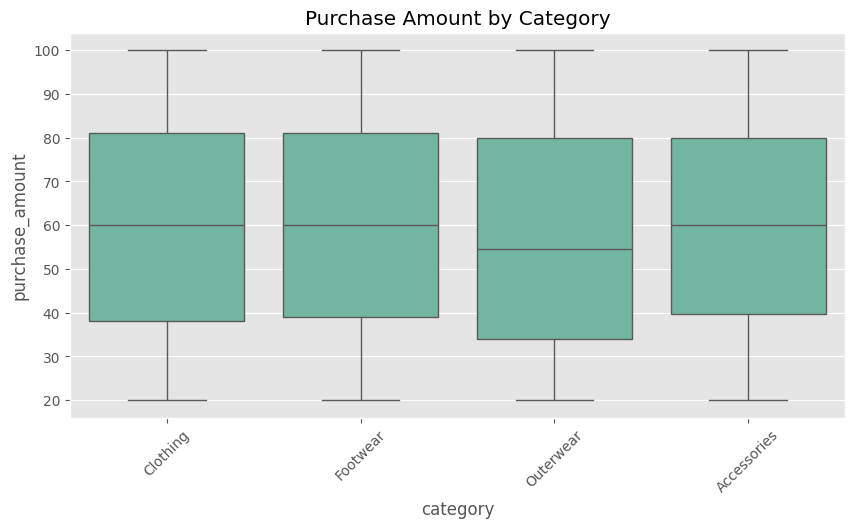

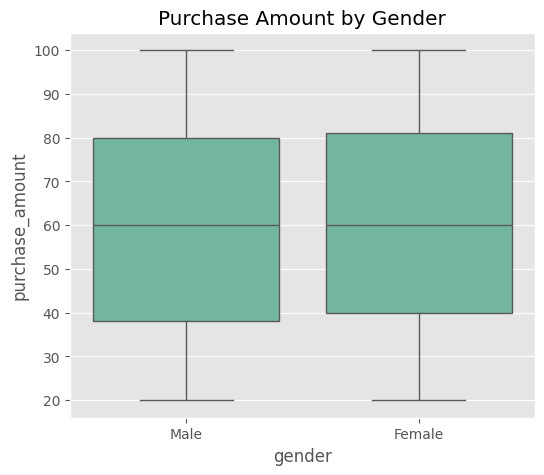

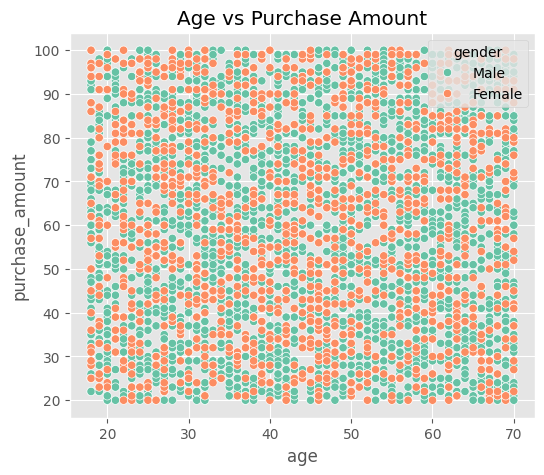

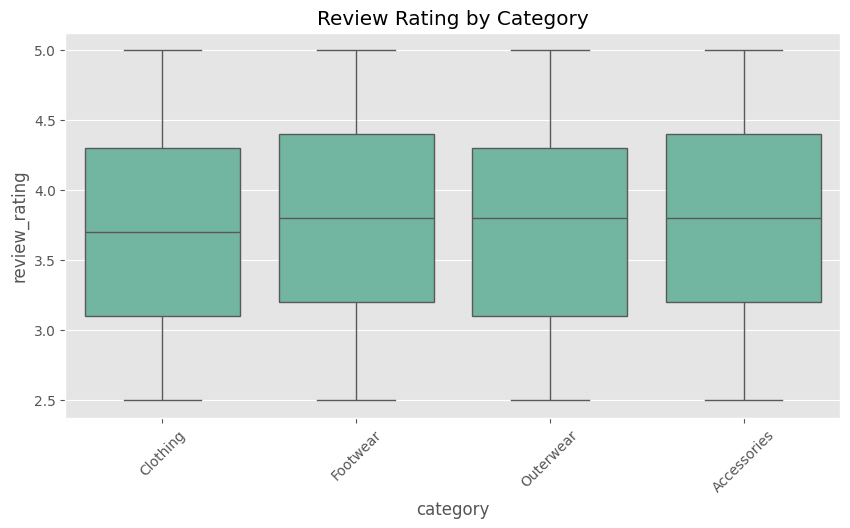

In [ ]:
# Bivariate Analysis

## PURCHASE AMOUNT BY CATEGORY
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="category", y="purchase_amount")
plt.title("Purchase Amount by Category")
plt.xticks(rotation=45)
plt.show()

## PURCHASE AMOUNT BY GENDER
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="gender", y="purchase_amount")
plt.title("Purchase Amount by Gender")
plt.show()

## AGE VS PURCHASE AMOUNT
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="age", y="purchase_amount", hue="gender")
plt.title("Age vs Purchase Amount")
plt.show()

## REVIEW RATING BY CATEGORY
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="category", y="review_rating")
plt.title("Review Rating by Category")
plt.xticks(rotation=45)
plt.show()


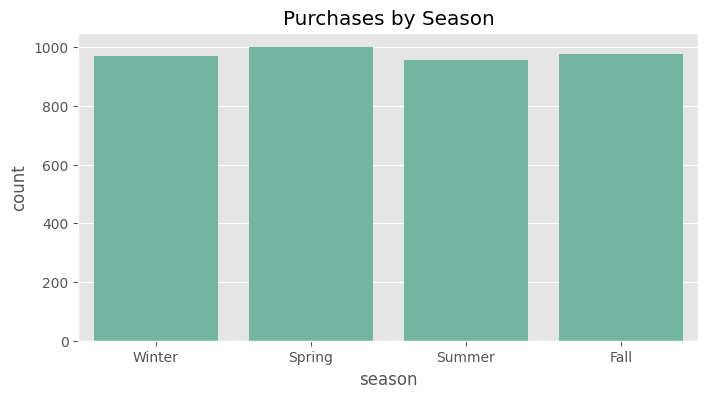

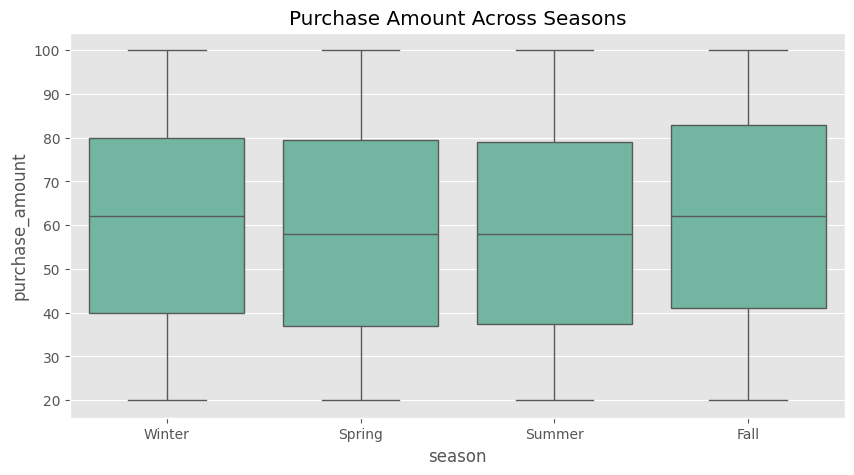

In [26]:
# Seasonal Shopping Patterns

plt.figure(figsize=(8,4))
sns.countplot(data=df, x="season")
plt.title("Purchases by Season")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="season", y="purchase_amount")
plt.title("Purchase Amount Across Seasons")
plt.show()



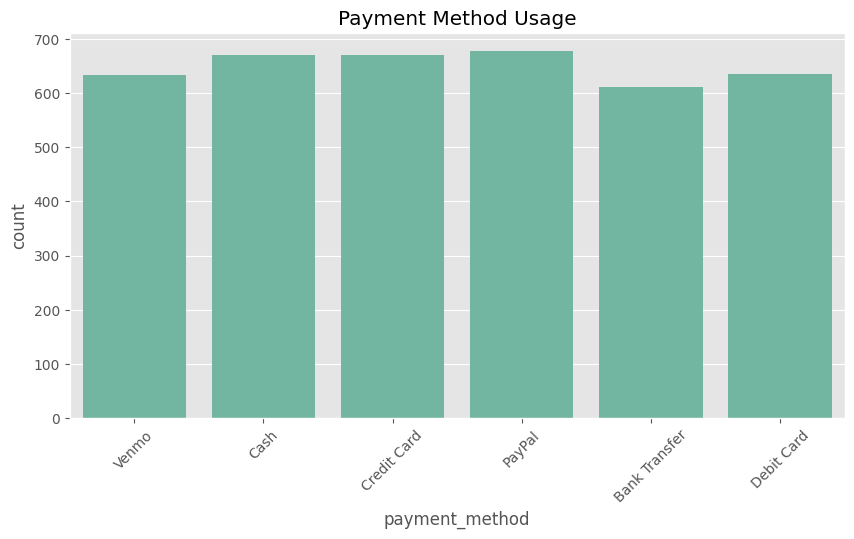

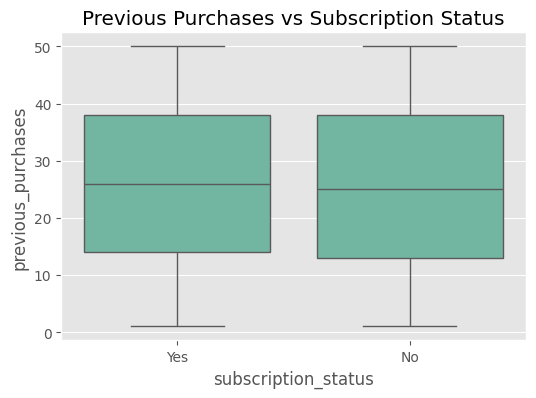

In [28]:

# Payment Behavior

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="payment_method")
plt.title("Payment Method Usage")
plt.xticks(rotation=45)
plt.show()


# Subscription Behavior

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="subscription_status", y="previous_purchases")
plt.title("Previous Purchases vs Subscription Status")
plt.show()

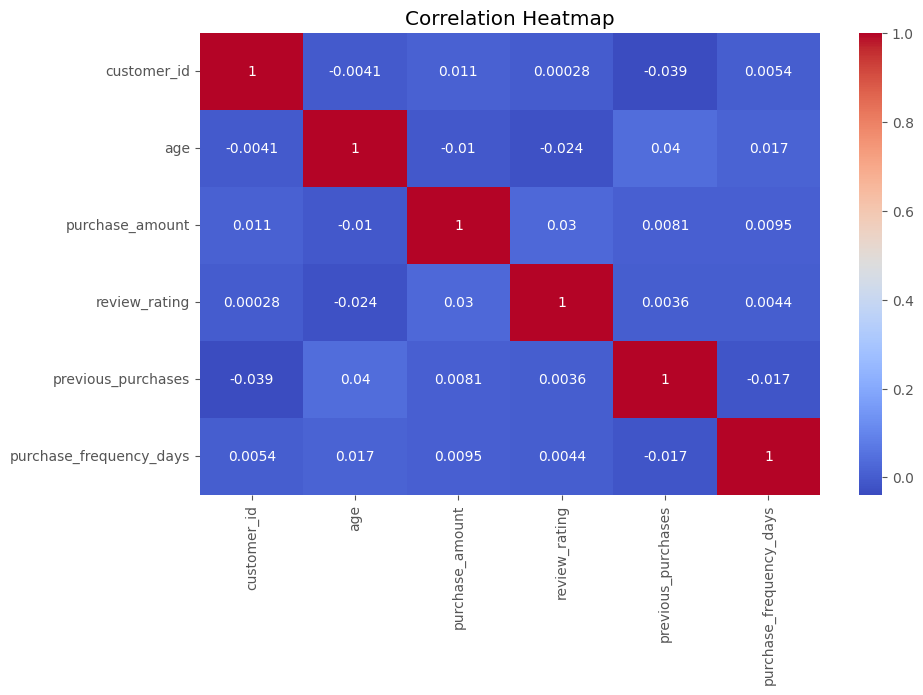

In [29]:
# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

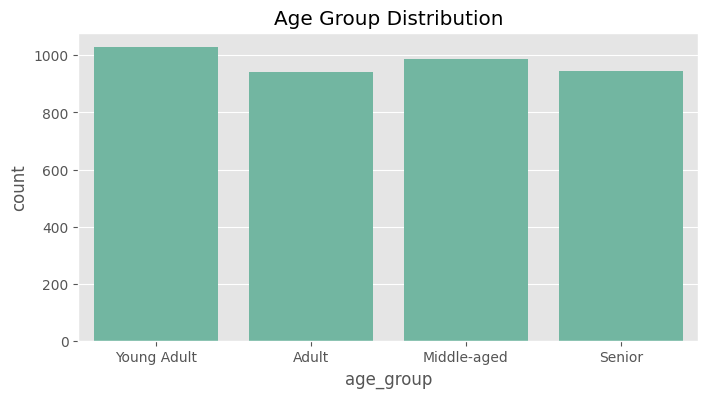

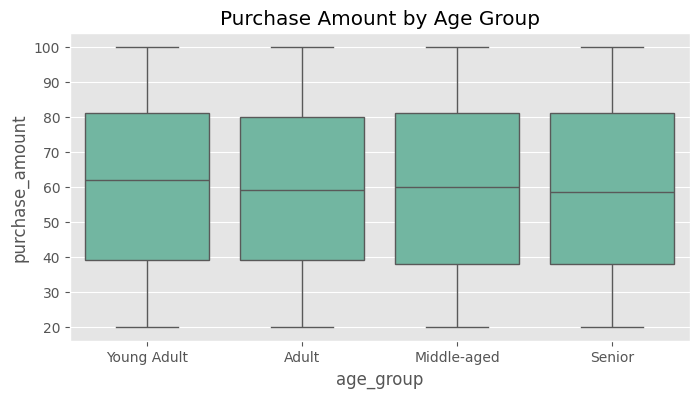

In [30]:
# Age Group Analysis (Your Engineered Feature)


plt.figure(figsize=(8,4))
sns.countplot(data=df, x="age_group")
plt.title("Age Group Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="age_group", y="purchase_amount")
plt.title("Purchase Amount by Age Group")
plt.show()

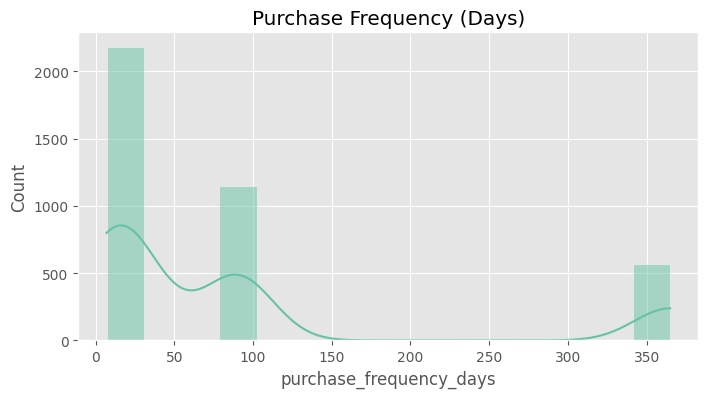

In [32]:
# Purchase Frequency Analysis

plt.figure(figsize=(8,4))
sns.histplot(df['purchase_frequency_days'], bins=15, kde=True)
plt.title("Purchase Frequency (Days)")
plt.show()


In [ ]:
pip install psycopg2-binary sqlalchemy

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB 330.3 kB/s eta 0:00:09
   ---------------------------------------- 0.0/2.7 MB 435.7 kB/s eta 0:00:07
   ---------------------------------------- 0.0/2.7 MB 435.7 kB/s eta 0:00:07
   ---------------------------------------- 0.0/2.7 MB 435.7 kB/s eta 0:00:07
   ---------------------------------------- 0.0/2.7 MB 435.7 kB/s eta 0:00:07
   ---------------------------------------- 0.0/2.7 MB 435.7 kB/s eta 0:00:07
   ---------------------------------------- 0.0/2.7 MB 435.7 kB/s eta 0:00:07
   - -------------------------------------- 0.1/2.7 MB 241.3 kB/s eta 0:00:11
   - -------------------------------------- 0.1/2.7 MB 241.3 kB/s eta 0:00:11
   - -------------------------------------- 0.1/2.7 MB 228.2 kB/s eta 0:00:12
   - -------------------------------------- 0.1/2.7 MB 228.2 kB/s eta 0:00:12
   - -------------------------------------- 0.1/2.7 MB 228.2 kB/s eta 0:0


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Connecting Python script to PostgreSQL
from sqlalchemy import create_engine

username = "postgres"
password = "2454"
host = "localhost"
port = "5432"
database = "customer_behavior"

engine = create_engine(
    f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
)

table_name = "customer"
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")


Data successfully loaded into table 'customer' in database 'customer_behavior'.
